<blockquote>
    <h1>Exercise 9.6</h1>
    <p>At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of $\mathrm{cost}$ that misclassifies a couple of training observations may perform better on test data than one with a huge value of $\mathrm{cost}$ that does not misclassify any training observations. You will now investigate this claim.</p>
    <ol>
        <li>Generate two-class data with $p = 2$ in such a way that the classes are just barely linearly separable.</li>
        <li>Compute the cross-validation error rates for support vector classifiers with a range of $\mathrm{cost}$ values. How many training errors are misclassified for each value of $\mathrm{cost}$ considered, and how does this relate to the cross-validation errors obtained?</li>
        <li>Generate an appropriate test data set, and compute the test errors corresponding to each of the values of $\mathrm{cost}$ considered. Which value of $\mathrm{cost}$ leads to the fewest test errors, and how does this compare to the values of $\mathrm{cost}$ that yield the fewest training errors and the fewest cross-validation errors?</li>
        <li>Discuss your results.</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

<h3>Exercise 9.6.1</h3>
<blockquote>
    <i>Generate two-class data with $p = 2$ in such a way that the classes are just barely linearly separable.</i>
</blockquote>

In [2]:
np.random.seed(42)
n = 500
x1 = np.random.uniform(low=-0.5, high=0.5, size=n)
x2 = np.random.uniform(low=-0.5, high=0.5, size=n)

x = np.vstack((x1, x2)).T
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

y = np.where(x2 > x1, True, False)

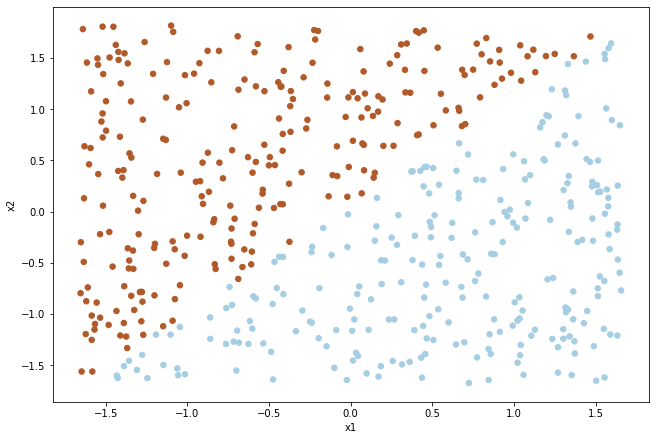

In [3]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 6))
_ = ax.scatter(x_standardized[:, 0], x_standardized[:, 1], c=y, s=30, cmap=plt.cm.Paired)
_ = ax.set_xlabel('x1')
_ = ax.set_ylabel('x2')

<h3>Exercise 9.6.2</h3>
<blockquote>
    <i>Compute the cross-validation error rates for support vector classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how does this relate to the cross-validation errors obtained?</i>
</blockquote>

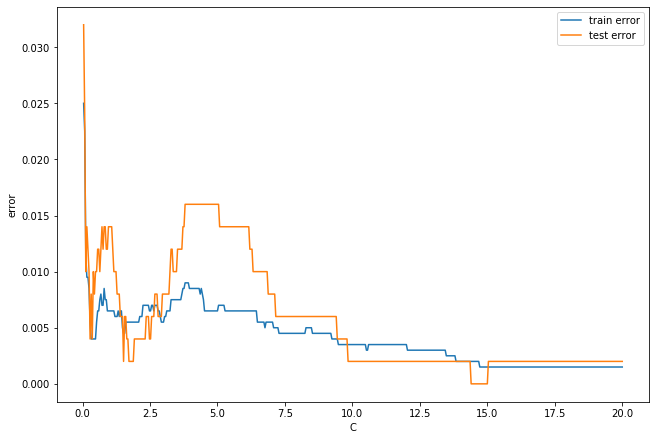

In [4]:
C_arr = np.linspace(0, 20, 501)
train_misclassification_arr = np.empty(shape=C_arr.shape)
test_misclassification_arr = np.empty(shape=C_arr.shape)


for i, C in enumerate(C_arr):
    linear_svm_class = Pipeline([
        ('scaler', StandardScaler()),
        ('rbf_svc', SVC(kernel='linear', C=C)),
    ])
    scores = cross_validate(linear_svm_class, x, y, cv=5, n_jobs=-1, return_train_score=True)
    train_accuracy = scores['train_score'].mean()
    test_accuracy = scores['test_score'].mean()
    train_misclassification_arr[i] = 1 - train_accuracy
    test_misclassification_arr[i] = 1 - test_accuracy

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 6))
_ = ax.plot(C_arr, train_misclassification_arr, label='train error')
_ = ax.plot(C_arr, test_misclassification_arr, label='test error')
_ = ax.set_xlabel('C')
_ = ax.set_ylabel('error')
_ = ax.legend()

<h3>Exercise 9.6.3</h3>
<blockquote>
    <i>Generate an appropriate test data set, and compute the test errors corresponding to each of the values of $\mathrm{cost}$ considered. Which value of $\mathrm{cost}$ leads to the fewest test errors, and how does this compare to the values of $\mathrm{cost}$ that yield the fewest training errors and the fewest cross-validation errors?</i>
</blockquote>

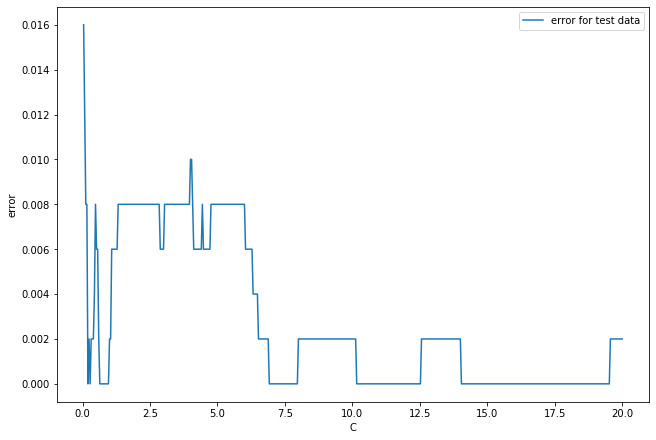

In [5]:
np.random.seed(0)
x1_test = np.random.uniform(low=-0.5, high=0.5, size=n)
x2_test = np.random.uniform(low=-0.5, high=0.5, size=n)

x_test = np.vstack((x1_test, x2_test)).T
x_test_standardized = scaler.transform(x_test)

y_test = np.where(x2_test > x1_test, True, False)

misclassification_arr = np.empty(shape=C_arr.shape)


x1_min, x1_max = x_test_standardized[:, 0].min() - 0.1, x_test_standardized[:, 0].max() + 0.1
x2_min, x2_max = x_test_standardized[:, 1].min() - 0.1, x_test_standardized[:, 1].max() + 0.1
xx1 = np.linspace(x1_min, x1_max)
xx2 = np.linspace(x2_min, x2_max)
for i, C in enumerate(C_arr):
    try:
        linear_svm_class = SVC(kernel='linear', C=C)
        _ = linear_svm_class.fit(x_standardized, y)
        y_pred = linear_svm_class.predict(x_test_standardized)
        accuracy = accuracy_score(y_test, y_pred, normalize=True)
        misclassification_arr[i] = 1 - accuracy
        
#         fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 6))
#         _ = ax.plot(xx1, xx2, c='black')
#         _ = ax.scatter(x_test_standardized[:, 0], x_test_standardized[:, 1], c=y_test, s=30, cmap=plt.cm.Paired)
#         _ = ax.set_title(f'accuracy of {100*accuracy}% with C = {C}')

    except ValueError as err: 
        if str(err) != 'C <= 0':
            raise
            
        misclassification_arr[i] = np.nan

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 6))
_ = ax.plot(C_arr, misclassification_arr, label='error for test data')
_ = ax.set_xlabel('C')
_ = ax.set_ylabel('error')
_ = ax.legend()

<h3>Exercise 9.6.4</h3>
<blockquote>
    <i>Discuss your results.</i>
</blockquote>

<p>The error for the test data as a function of $C$ follows a similar pattern as the  cross-validated test error.</p>